# Research of apartments for sale ads

You have at your disposal the data of Yandex.Real Estate service - an archive of several years' worth of apartments for sale in St. Petersburg and nearby settlements. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will help to build an automated system: it will track anomalies and fraudulent activity. 

Two types of data are available for each apartment for sale. The first is entered by the user, the second is automatically obtained on the basis of map data. For example, the distance to the center, the airport, the nearest park and body of water. 

## 1. Open the data file and examine the general information. 

Import the pandas library and matplotlib.pyplot. Read the data from the csv-file into the dataframe and save it to the variable data. Print the first 5 rows of the table:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Let's build a common histogram for all numeric columns of the table:

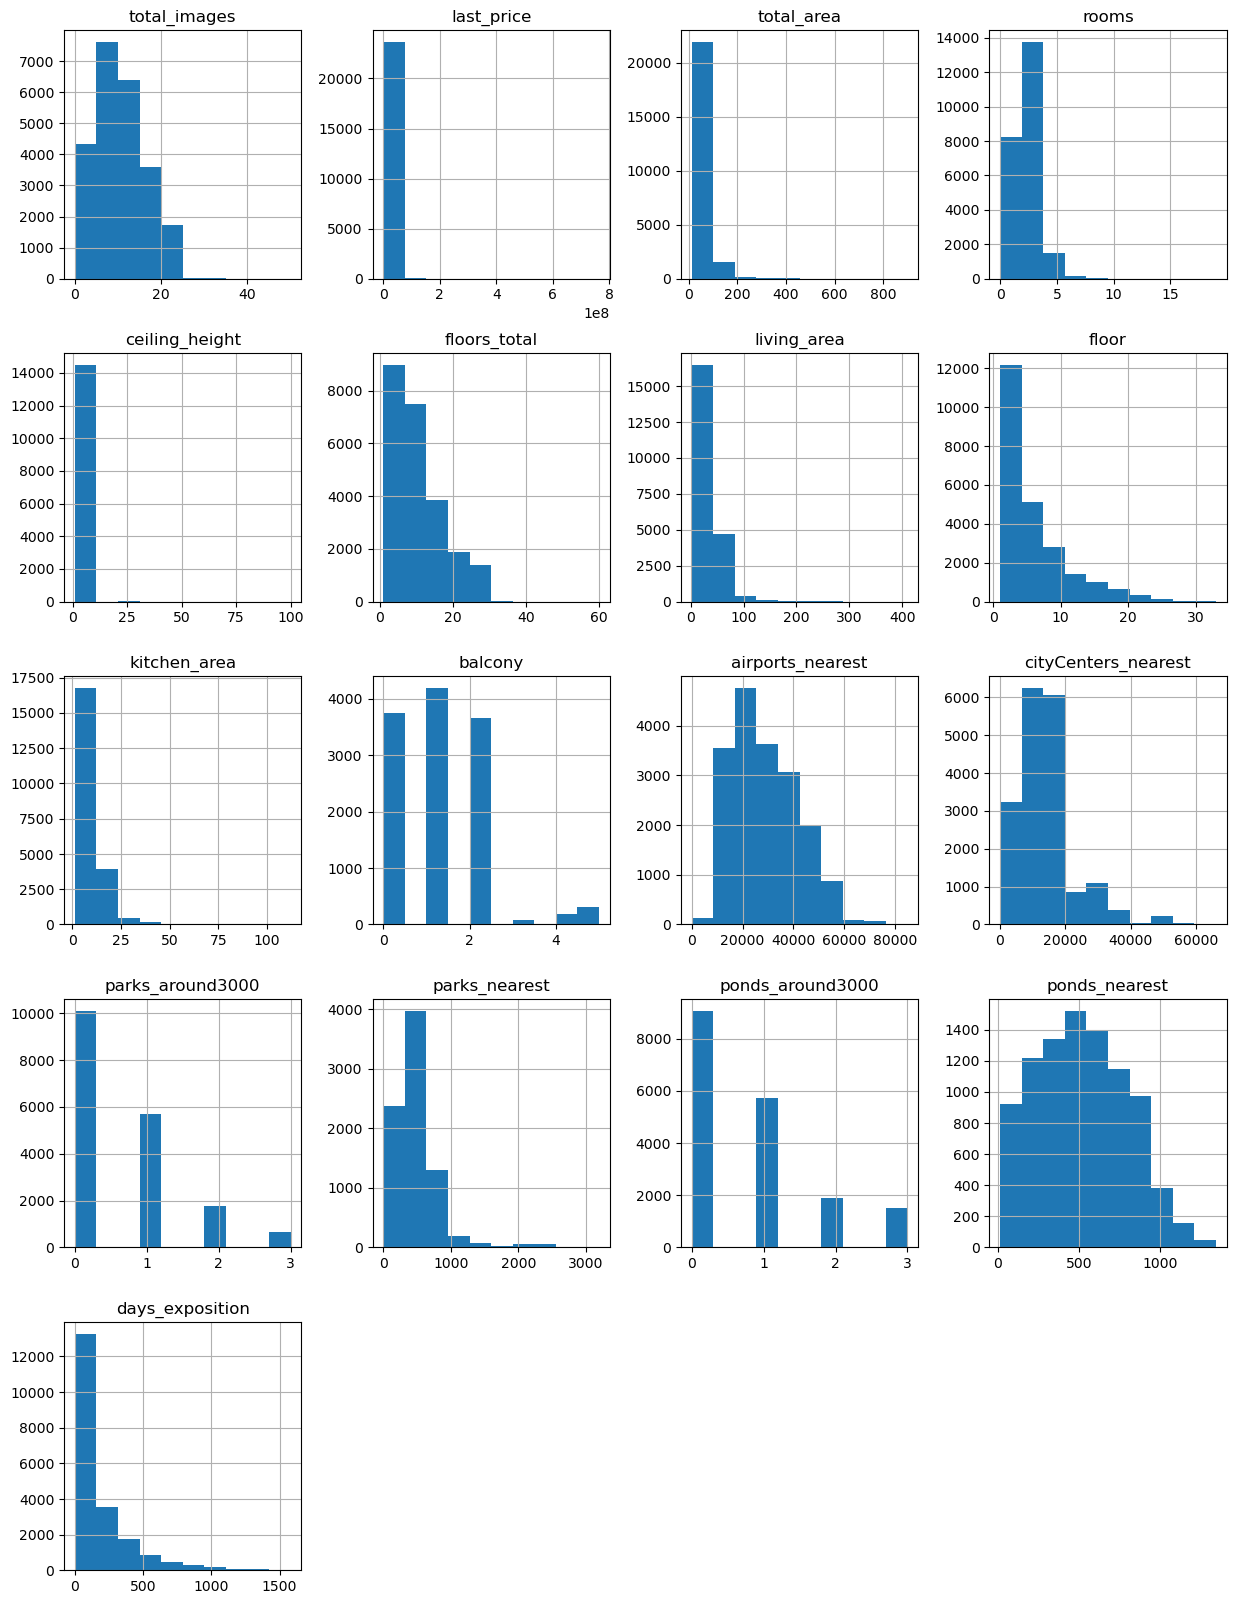

In [2]:
data.hist(figsize=(15, 20),bins=10);

Let's output the basic information using the info() method:

In [3]:
print('Number of obvious duplicates:', data.duplicated().sum())
print()
data.info()

Number of obvious duplicates: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null 

**Conclusion**: In the obtained data, when studying the information, a large number of gaps, the writing of columns is not snake_case, the wrong data types of values. The number of obvious duplicates is not found, histograms require more detailed analysis. We will deal with this in the next steps.

## 2. Data preprocessing

There are missing values in the data, display their number in each column and check if there are duplicates in the table:

In [4]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Replace the names of the columns with the correct names and explain in what values the data are presented:

In [5]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest_m',
                       'ponds_around3000':'ponds_amount_around_3000_m',
                       'parks_around3000':'parks_amount_around_3000_m',
                       'ceiling_height': 'ceiling_height_m',
                       'living_area': 'living_area_m2',
                       'kitchen_area' : 'kitchen_area_m2',
                       'airports_nearest' : 'airports_nearest_m',
                       'parks_nearest' : 'parks_nearest_m',
                       'ponds_nearest' : 'ponds_nearest_m',
                       'total_area' : 'total_area_m2',
                       'last_price': 'last_price_rub'}, inplace=True)

Replace the missing values in the columns `balcony`, `park_nearest_m`, `is_apartment`, `airports_nearest_m`, `parks_around_3000_m`, `ponds_around_3000_m`, `ponds_nearest_m`, `city_centers_nearest` with '0'. In all these columns the seller did not specify a value in the cell, most likely because it is missing. For example, the presence of a park, body of water, or airport nearby. These omissions are non-random. Let's output the updated data on the number of missing values:

In [6]:
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_nearest_m'] = data['parks_nearest_m'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(value=0)
data['airports_nearest_m'] = data['airports_nearest_m'].fillna(value=0)
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].fillna(value=0)
data['parks_amount_around_3000_m'] = data['parks_amount_around_3000_m'].fillna(value=0)
data['ponds_amount_around_3000_m'] = data['ponds_amount_around_3000_m'].fillna(value=0)
data['ponds_nearest_m'] = data['ponds_nearest_m'].fillna(value=0)        
print(data.isna().sum())

total_images                     0
last_price_rub                   0
total_area_m2                    0
first_day_exposition             0
rooms                            0
ceiling_height_m              9195
floors_total                    86
living_area_m2                1903
floor                            0
is_apartment                     0
studio                           0
open_plan                        0
kitchen_area_m2               2278
balcony                          0
locality_name                   49
airports_nearest_m               0
city_centers_nearest_m           0
parks_amount_around_3000_m       0
parks_nearest_m                  0
ponds_amount_around_3000_m       0
ponds_nearest_m                  0
days_exposition               3181
dtype: int64


Replace the missing values in the `ceiling_height` column with the median value, because in this case this value is the least variable and the omission is most likely due to the standard ceiling height, which is equal to the median. The living area (`living_area_m2`) and kitchen area (`kitchen_area_m2`) depend on the total area of the apartment, so we can calculate what the shares of both values are on average and apply them to the empty values. These omissions are treated as random. Let's display the updated data with the number of missing values on the screen:

In [7]:
medium_ceiling = data['ceiling_height_m'].median()
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(value=medium_ceiling)
avg_kitchen_area = (data['kitchen_area_m2'] / data['total_area_m2']).median()
data['kitchen_area_m2'] = data['kitchen_area_m2'].fillna(value=avg_kitchen_area * data['total_area_m2'])
avg_living_area = (data['living_area_m2'] / data['total_area_m2']).median()
data['living_area_m2'] = data['living_area_m2'].fillna(value=avg_living_area * data['total_area_m2'])
print(data.isna().sum())
print()
print('Median height of ceilings:', medium_ceiling)
print('Median share of the kitchen area in the apartment:', avg_kitchen_area)
print('Median share of living space in the apartment:', avg_living_area)

total_images                     0
last_price_rub                   0
total_area_m2                    0
first_day_exposition             0
rooms                            0
ceiling_height_m                 0
floors_total                    86
living_area_m2                   0
floor                            0
is_apartment                     0
studio                           0
open_plan                        0
kitchen_area_m2                  0
balcony                          0
locality_name                   49
airports_nearest_m               0
city_centers_nearest_m           0
parks_amount_around_3000_m       0
parks_nearest_m                  0
ponds_amount_around_3000_m       0
ponds_nearest_m                  0
days_exposition               3181
dtype: int64

Median height of ceilings: 2.65
Median share of the kitchen area in the apartment: 0.1724137931034483
Median share of living space in the apartment: 0.5678598992678503


Let's check the `days_exposition` column and unload the dataframe by filtering it by empty values of this column:

In [8]:
data.query('days_exposition.isna()')

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,0,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.658769,22,0,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,22.714396,3,0,...,6.896552,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.300000,7,0,...,7.000000,0.0,Санкт-Петербург,30011.0,12872.0,0.0,0.0,0.0,0.0,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.700000,9,0,...,8.300000,2.0,Санкт-Петербург,15114.0,12702.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.400000,17,0,...,15.600000,0.0,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,0.0,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.300000,5,0,...,5.600000,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,0.0,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,0,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,0,...,9.775862,0.0,село Рождествено,0.0,0.0,0.0,0.0,0.0,0.0,NaN


The table leaves out the values in the `locality_name` and `floors_total` columns. These values cannot be replaced by averages and do not depend on other indicators. The number of floors in the house, for example, can be 2 or 15, the average house will be 7 floors, which is not correct. This data can not be used in the analysis, because the number of floors in the house will affect other factors, such as price, availability of water bodies and parks, these lines we will remove from the dataframe (such values are only 86, it will not affect the overall conclusions). Also the name of the settlement cannot be replaced, this value also does not depend on any other values in the table. The missing values in this column will be replaced with 'Unknown'. This type of omission is completely random.

In [9]:
data = data.dropna(subset =['floors_total'])
data['locality_name'] = data['locality_name'].fillna(value='Unknown')
data = data.drop_duplicates().reset_index(drop=True)

Check the data types in each column:

In [10]:
data.dtypes

total_images                    int64
last_price_rub                float64
total_area_m2                 float64
first_day_exposition           object
rooms                           int64
ceiling_height_m              float64
floors_total                  float64
living_area_m2                float64
floor                           int64
is_apartment                   object
studio                           bool
open_plan                        bool
kitchen_area_m2               float64
balcony                       float64
locality_name                  object
airports_nearest_m            float64
city_centers_nearest_m        float64
parks_amount_around_3000_m    float64
parks_nearest_m               float64
ponds_amount_around_3000_m    float64
ponds_nearest_m               float64
days_exposition               float64
dtype: object

From the table, the data type in the `first_day_exposition` column should be changed from **object** to **datetime** because it contains dates. The `floors_total` and `balcony` should be changed to **int**, because there cannot be a fractional total number of floors in the house or half a balcony. Give `is_apartment` the type **bool** because the column contains True and False boolean values.

In [11]:
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data.dtypes

total_images                           int64
last_price_rub                       float64
total_area_m2                        float64
first_day_exposition          datetime64[ns]
rooms                                  int64
ceiling_height_m                     float64
floors_total                           int32
living_area_m2                       float64
floor                                  int64
is_apartment                            bool
studio                                  bool
open_plan                               bool
kitchen_area_m2                      float64
balcony                                int32
locality_name                         object
airports_nearest_m                   float64
city_centers_nearest_m               float64
parks_amount_around_3000_m           float64
parks_nearest_m                      float64
ponds_amount_around_3000_m           float64
ponds_nearest_m                      float64
days_exposition                      float64
dtype: obj

Check the column with the names of settlements for implicit duplicates:

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

There are many implicit duplicates, because there are names with different settlements and no settlements at all, so we create a column with the type of settlement and leave the name itself in the current column, thus significantly reducing the presence of duplicates, as well as keeping the type of settlement in a separate column. It is worth noting that St. Petersburg is a city, so we will assign it to this group separately, while the names without settlements will be assigned to the 'unknown' group:

In [13]:
def locality_type(row):
    try:
        if 'железнодорож' in row:
            return 'поселок при железнодорожной станции'        
        elif 'коттедж' in row:
            return 'коттеджный поселок'
        elif 'Пансионат' in row:
            return 'пансионат'
        elif 'садовое товарищество' in row or 'садоводческое некоммерческое товарищество' in row:
            return 'садовое товарищество'
        elif 'посёлок городского типа' in row or 'поселок городского типа' in row or 'городской поселок' in row:
            return 'поселок городского типа'
        elif 'поселок' in row or 'посёлок' in row:
            return 'поселок'        
        elif 'село' in row:
            return 'село'
        elif 'деревня' in row:
            return 'деревня'
        elif 'Санкт-Петербург' in row:
            return 'город'
        else:
            return 'unknown'
    except:
        return 'no'
data['locality_type'] = data['locality_name'].apply(locality_type)
print(data['locality_type'].value_counts())

город                                  15651
unknown                                 4331
поселок                                 2258
деревня                                  944
поселок городского типа                  385
село                                      32
садовое товарищество                       5
коттеджный поселок                         3
поселок при железнодорожной станции        2
пансионат                                  2
Name: locality_type, dtype: int64


In [14]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('Пансионат ', '')

In [15]:
data.sample(5)

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
17059,20,5400000.0,71.6,2018-02-07,3,2.75,9,45.2,6,False,...,0,Шлиссельбург,0.0,0.0,0.0,0.0,0.0,0.0,306.0,unknown
19681,11,7600000.0,58.8,2018-02-16,2,2.65,6,38.9,3,False,...,0,Санкт-Петербург,25955.0,6311.0,2.0,450.0,0.0,0.0,210.0,город
11511,1,2000000.0,32.9,2016-05-31,1,2.50,9,18.6,4,False,...,0,Сертолово,0.0,0.0,0.0,0.0,0.0,0.0,45.0,unknown
12627,17,13000000.0,72.0,2017-07-15,3,3.56,3,44.0,1,False,...,0,Санкт-Петербург,24289.0,2488.0,1.0,630.0,2.0,587.0,179.0,город
1039,9,9250000.0,96.0,2017-06-22,3,3.80,4,68.0,3,False,...,0,Санкт-Петербург,22628.0,2169.0,1.0,655.0,0.0,0.0,480.0,город


Let's find and eliminate the rare and outlier values by first displaying the maximum values of all columns:

In [16]:
data.max()

total_images                                   50
last_price_rub                        763000000.0
total_area_m2                               900.0
first_day_exposition          2019-05-03 00:00:00
rooms                                          19
ceiling_height_m                            100.0
floors_total                                   60
living_area_m2                              409.7
floor                                          33
is_apartment                                 True
studio                                       True
open_plan                                    True
kitchen_area_m2                             112.0
balcony                                         5
locality_name                     имени Свердлова
airports_nearest_m                        84869.0
city_centers_nearest_m                    65968.0
parks_amount_around_3000_m                    3.0
parks_nearest_m                            3190.0
ponds_amount_around_3000_m                    3.0


In the data, the `ceiling_height_m` column is immediately highlighted, with information about the ceiling height equal to 100 meters. Let's display the unique values of the column on the screen:

In [17]:
print(data['ceiling_height_m'].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

Ceilings higher than 20 meters most likely were entered by mistake and meant real values, e.g. 2.0 m instead of 20. Replace such values with correct values and check if there are no such values left:

In [18]:
rows = data['ceiling_height_m']/10
data['ceiling_height_m'] = data['ceiling_height_m'].where(data['ceiling_height_m']<20, rows)
print('Maximum ceiling height:', data['ceiling_height_m'].max(), 'm')

Maximum ceiling height: 14.0 m


The ceilings of 14 meters also raise questions, let's unload the data for this apartment and check what can be connected with the error:

In [19]:
data[data['ceiling_height_m']>=14]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
14999,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,2,Санкт-Петербург,14814.0,13610.0,0.0,0.0,0.0,0.0,315.0,город


From the table you can see that the next column shows the value of 14 floors in the house, it means that when filling out the ad there was a human error, the data was mistakenly entered in both columns. Let's replace the height of the ceilings in this ad with the median value calculated earlier:

In [20]:
data['ceiling_height_m'] = data['ceiling_height_m'].where(data['ceiling_height_m']!=14, medium_ceiling)
print('Maximum ceiling height:', data['ceiling_height_m'].max(), 'm')

Maximum ceiling height: 10.3 m


The rest of the maximal data is possible. Now let's check the minimum values for the columns:

In [21]:
data.min()

total_images                                    0
last_price_rub                            12190.0
total_area_m2                                12.0
first_day_exposition          2014-11-27 00:00:00
rooms                                           0
ceiling_height_m                              1.0
floors_total                                    1
living_area_m2                                2.0
floor                                           1
is_apartment                                False
studio                                      False
open_plan                                   False
kitchen_area_m2                               1.3
balcony                                         0
locality_name                             Unknown
airports_nearest_m                            0.0
city_centers_nearest_m                        0.0
parks_amount_around_3000_m                    0.0
parks_nearest_m                               0.0
ponds_amount_around_3000_m                    0.0


The column `last_price_rub` is selected from the data, as the price of the apartment 12,190 rubles is suspicious. Let's check all apartments with a price below 400,000 rubles

In [22]:
data[data['last_price_rub']<400000]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
8765,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,0.0,8.0,город


In the range up to 400,000 rubles this apartment is one, from the rest of the data it follows that the ad is most likely fraudulent or the price is listed in another currency, because for a two-bedroom apartment of 109 square meters in St. Petersburg this price does not look realistic. Let's delete the line with this ad:

In [23]:
data = data.query('index!=8765').reset_index(drop=True)
print('Minimum cost of the apartment:', data['last_price_rub'].min(), 'rub')

Minimum cost of the apartment: 430000.0 rub


Also highlighted column `ceiling_height_m` with a ceiling height of 1 meter, check apartments with ceiling heights below 2 meters:

In [24]:
data[data['ceiling_height_m']<2]

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
5693,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,0,Мга,0.0,0.0,0.0,0.0,0.0,0.0,248.0,поселок
16865,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,0,Санкт-Петербург,18732.0,20444.0,0.0,0.0,3.0,80.0,71.0,город
22507,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,город


There are only 3 such values, they also do not look realistic, let's get rid of these lines, because it is not possible to substitute any value, we do not know why this error was made and what value was meant.

In [25]:
data = data.query('ceiling_height_m >=2').reset_index(drop=True)
print('Minimum ceiling height:', data['ceiling_height_m'].min(), 'метра')

Minimum ceiling height: 2.0 метра


The last thing that needs checking is the `living_area_m2` column with information about the living area equal to 2 meters. Using sequential filtering, we will find anomalous values in which the living area is less than 10 meters, with 25% of the total apartment area (which is significantly lower than the median value of the living area), with the sum of the kitchen area and living area half as much as the total apartment area. Given all these criteria, the values found will be anomalous. Let us display the columns `total_area_m2`, `living_area_m2`, `kitchen_area_m2`

In [26]:
data['living_area_m2'].min()
filtered_living_area = data[data['living_area_m2']<=10]
x4_living_area = filtered_living_area['living_area_m2']*4
sum_living_Kitchen = filtered_living_area['living_area_m2']+filtered_living_area['kitchen_area_m2']
filtered_living_area = filtered_living_area[filtered_living_area['total_area_m2'] >= x4_living_area]
filtered_living_area = filtered_living_area.query('total_area_m2 >= ((kitchen_area_m2+living_area_m2)*2)')
filtered_living_area

,total_images,last_price_rub,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,city_centers_nearest_m,parks_amount_around_3000_m,parks_nearest_m,ponds_amount_around_3000_m,ponds_nearest_m,days_exposition,locality_type
3232,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,False,...,0,Санкт-Петербург,19272.0,13073.0,0.0,0.0,0.0,0.0,216.0,город
8297,9,4800000.0,52.0,2017-10-25,2,2.65,5,9.0,2,False,...,1,Санкт-Петербург,33358.0,13171.0,0.0,0.0,2.0,118.0,119.0,город
13857,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,...,0,Санкт-Петербург,32453.0,6521.0,0.0,0.0,1.0,1012.0,91.0,город
17510,11,2680000.0,22.0,2018-08-11,0,2.65,25,5.0,8,False,...,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,город
21674,0,2330000.0,23.0,2018-01-01,0,2.65,24,2.0,22,False,...,0,Мурино,0.0,0.0,0.0,0.0,0.0,0.0,66.0,поселок
21859,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,...,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,0.0,33.0,город
23486,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,...,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,город


It follows from the table that there are only 7 anomalous values and they look, as expected, not realistic, for example an apartment with an area of 139 meters, a living area of 3 meters and a kitchen of 16 meters. Let's apply the conditions and delete the rows. Replace them with other data is not possible, there is no information about the rest of the area.

In [27]:
data = data.query('living_area_m2 >10 and (total_area_m2<living_area_m2*4) \
and (total_area_m2 < kitchen_area_m2*2+living_area_m2*2)').reset_index(drop=True)
print('Минимальная жилая площадь:', data['living_area_m2'].min(), 'кв.м')
data[['total_area_m2','living_area_m2','kitchen_area_m2']].tail(5)

Минимальная жилая площадь: 10.08 кв.м


,total_area_m2,living_area_m2,kitchen_area_m2
23453,133.81,73.300000,13.830000
23454,59.00,38.000000,8.500000
23455,56.70,29.700000,9.775862
23456,76.75,43.583247,23.300000
23457,32.30,12.300000,9.000000


Now the data looks logical, all that's left is to make it look like two decimal places:

In [28]:
data = data.round({'living_area_m2':2, 'kitchen_area_m2':2})
data[['total_area_m2','living_area_m2','kitchen_area_m2']].sample(5)

,total_area_m2,living_area_m2,kitchen_area_m2
2699,58.00,42.00,5.50
3815,36.65,11.15,15.69
10143,59.40,28.50,16.80
19429,46.00,30.20,7.00
1144,48.00,24.00,9.00


**Conclusion:** we have found and eliminated missing values, considered and converted data types in columns, eliminated implicit duplicates and knocked out values. Now we can proceed to the next step.

### Count and add new columns to the table

Let's add a column `price_one_m2` with the price of one square meter:

In [29]:
data['price_one_m2'] = data['last_price_rub'] / data['total_area_m2']
data = data.round({'price_one_m2':2})

Let's add columns `exposition_weekday`, `exposition_month`, `exposition_year` with the day of the week, month and year of the announcement:

In [30]:
data['exposition_weekday'] = data['first_day_exposition'].dt.day_name()
data['exposition_month'] = data['first_day_exposition'].dt.month_name()
data['exposition_year'] = data['first_day_exposition'].dt.year

Let's add a column `floor_type` with the floor type of the apartment

In [31]:
def floor_types(row):
    try:
        if row['floor'] == 1:
            return 'first'        
        elif row['floor'] == row['floors_total']:
            return 'last'
        else:
            return 'other'
    except:
        return 'no'
data['floor_type'] = data.apply(floor_types, axis=1)
print(data['floor_type'].value_counts())

other    17267
last      3307
first     2884
Name: floor_type, dtype: int64


Add a column `city_centers_nearest_km` with the distance to the city center in km

In [32]:
data['city_centers_nearest_km'] = data['city_centers_nearest_m']/1000
data = data.round({'city_centers_nearest_km':0})

Display all the added columns:

In [33]:
data[['price_one_m2', 'exposition_weekday', 'exposition_month', 'exposition_year',\
      'floor_type', 'city_centers_nearest_km']].head(5)

,price_one_m2,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
0,120370.37,Thursday,March,2019,other,16.0
1,82920.79,Tuesday,December,2018,first,19.0
2,92785.71,Thursday,August,2015,other,14.0
3,408176.10,Friday,July,2015,other,7.0
4,100000.00,Tuesday,June,2018,other,8.0


**Conclusion:** we added new columns to the table, now it will be more convenient and easier to examine the data

## 3. Exploratory data analysis

**I.** Consider the following parameters: total area, living area, kitchen area, price of the object, number of rooms, ceiling height, apartment floor, apartment floor type ("first", "last", "other"), total number of floors in the house, distance to the city center in meters, distance to the nearest airport, distance to the nearest park, day and month of publication of the ad.

Let's explore the column `total_area_m2` with the total area of the apartment. Let's unload the data using the describe() method, build a boxplot and a histogram.

count    23458.000000
mean        60.202943
std         35.259512
min         14.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        900.000000
Name: total_area_m2, dtype: float64

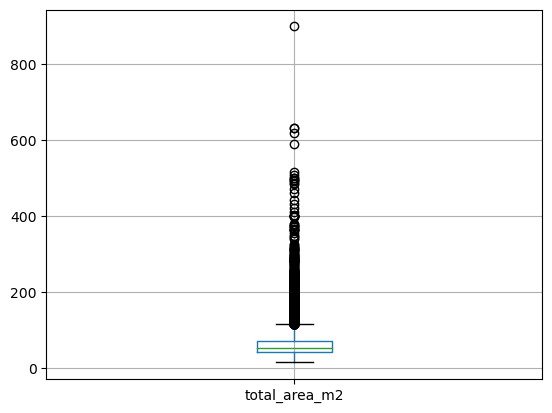

In [34]:
data.boxplot(column=['total_area_m2'])
data['total_area_m2'].describe()

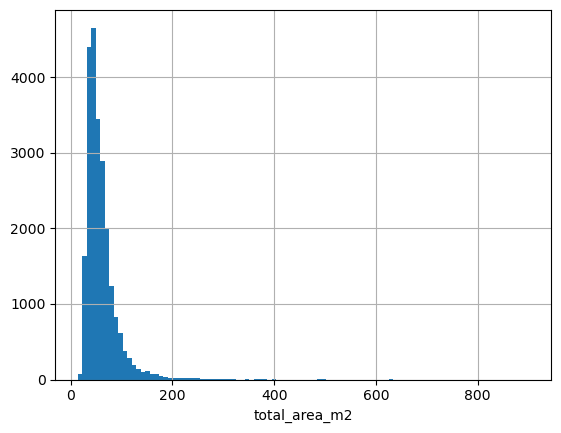

In [35]:
data['total_area_m2'].hist(bins=100).set_xlabel('total_area_m2');

The histogram is similar to the normal distribution graph, but it contains a tail to the right side. In the listings, the average area of apartments is 60 square meters, the minimum area is 14 square meters, and the median area of apartments is 52 square meters. It is worth noting that the average area is higher than the median area due to apartments with an area of 200 square meters and more, this is clearly presented in the spread chart

Let's explore the column `living_area_m2` with the living area of the apartment. Unload the data using the describe() method, construct a boxplot and a histogram.

count    23458.000000
mean        34.658638
std         22.333908
min         10.080000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area_m2, dtype: float64

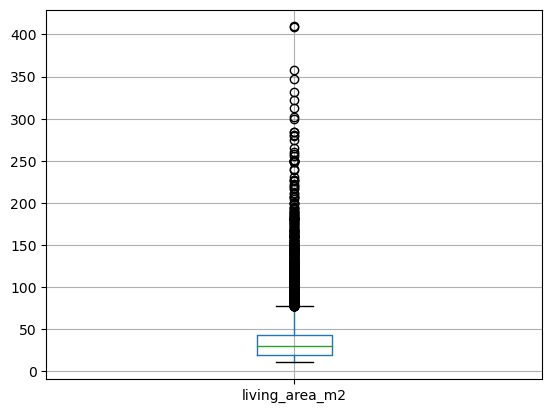

In [36]:
data.boxplot(column=['living_area_m2'])
data['living_area_m2'].describe()

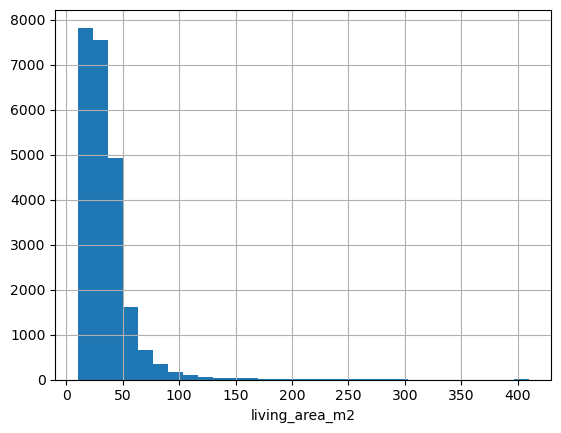

In [37]:
data['living_area_m2'].hist(bins=30).set_xlabel('living_area_m2');

The histogram immediately shows a peak close to 20 square meters, which is not a Poisson distribution, there is also a tail of values to the higher side. On average, apartments with a living area of 34 sq.m. are listed in the ads, the median is close to the average and is 30 sq.m. The advertisement with the minimum living area is 10 sq.m., the maximum is 409 sq.m.

Let's explore the column `kitchen_area_m2` by kitchen area. Unload the data using the describe() method, build a boxplot and a histogram.

count    23458.000000
mean        10.458586
std          5.976448
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area_m2, dtype: float64

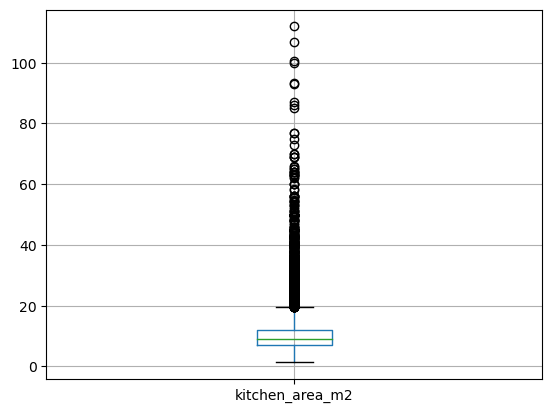

In [38]:
data.boxplot(column=['kitchen_area_m2'])
data['kitchen_area_m2'].describe()

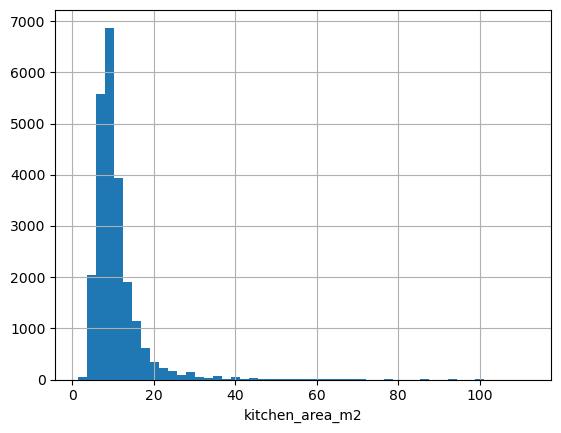

In [39]:
data['kitchen_area_m2'].hist(bins=50).set_xlabel('kitchen_area_m2');

The kitchen area, unlike the living area, tends to a Poisson distribution. In the ads: the average kitchen area is 10 sq.m., minimum 1.3 sq.m. (which is normal, given the apartments with an open floor plan and studios, where the kitchen and living space - is practically a single space), the median is 10 sq.m., and the maximum area of 112 sq.m.

Let's explore the column `last_price_rub` with the price of the object. Let's unload the data using the describe() method, build a boxplot and a histogram. For more convenient perception of the information, let's create a column where the price will be specified in million rubles

<AxesSubplot:>

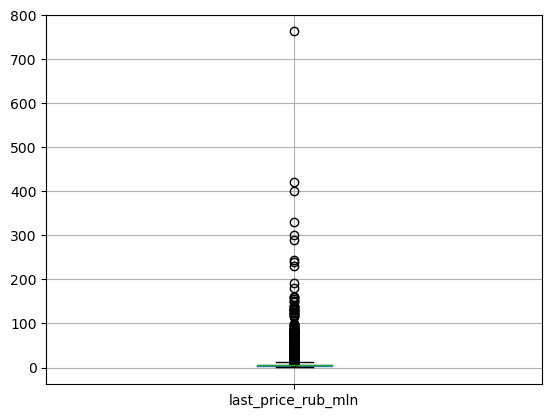

In [40]:
data['last_price_rub_mln'] = data['last_price_rub']/1000000
data.boxplot(column=['last_price_rub_mln'])

count    23458.000000
mean         6.518754
std         10.875999
min          0.430000
25%          3.405250
50%          4.642000
75%          6.760000
max        763.000000
Name: last_price_rub_mln, dtype: float64

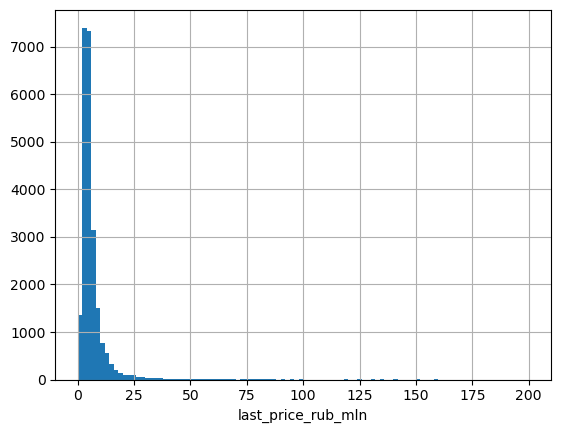

In [41]:
data['last_price_rub_mln'].hist(bins=100, range=(0,200)).set_xlabel('last_price_rub_mln')
data['last_price_rub_mln'].describe()

It follows from the data that the ad with the lowest price is 0.43 million rubles, the average price for an apartment is 6.5 million rubles. Because of the apartments with a very high price, the median is much lower than the average and is 4.6 million rubles, which is more correct for estimating the average price. The maximum price of the apartment is 763 million rubles.

Let's explore the `rooms` column with information about the number of rooms. Unload the data using the describe() method and construct a boxplot and a histogram.

count    23458.000000
mean         2.072257
std          1.077081
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

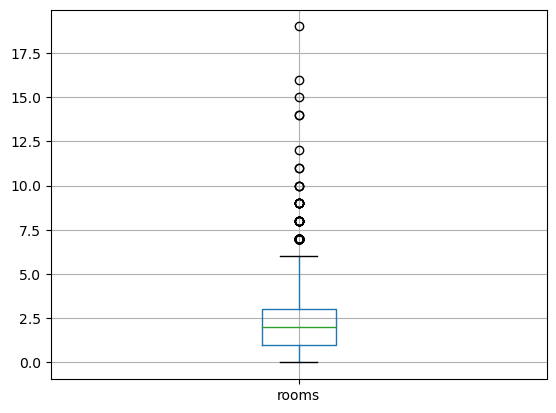

In [42]:
data.boxplot(column=['rooms'])
data['rooms'].describe()

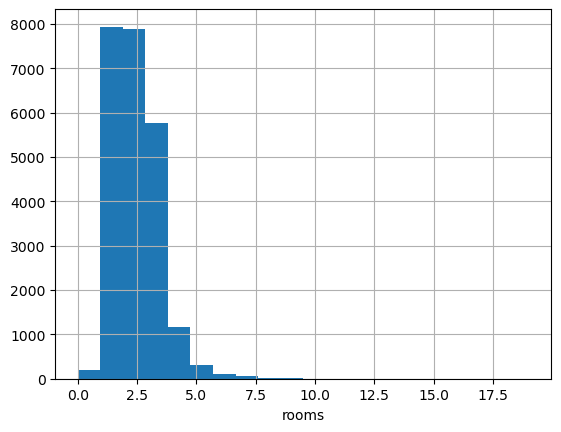

In [43]:
data['rooms'].hist(bins=20).set_xlabel('rooms');

Poisson distribution histogram. On average, the data contain ads for apartments for sale with 2 rooms, the minimum number of rooms - 0 (this includes studios, open floor plans), the median is also equal to 2 rooms, interquartile distribution looks logical, there are outliers starting from 6 rooms. The maximum number of rooms is 19.

Let's explore the `ceiling_height_m` column with information about ceiling height. Let's unload the data using the describe() method and build a histogram.

count    23458.000000
mean         2.698197
std          0.242316
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height_m, dtype: float64

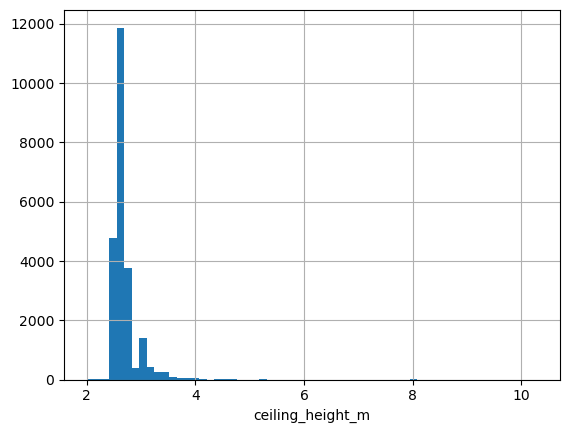

In [44]:
data['ceiling_height_m'].hist(bins=60).set_xlabel('ceiling_height_m')
data['ceiling_height_m'].describe()

It follows from the data that the average ceiling height in the apartment is 2.7 meters, which is almost equal to the median value (2.65), the maximum ceiling height is 10.3 meters. The standard distribution is normal and is 24 cm

Let's explore the `floor` column with information about the floor of the apartment. Let's unload the data using the describe() method, construct a boxplot and a histogram.

count    23458.000000
mean         5.875224
std          4.865413
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

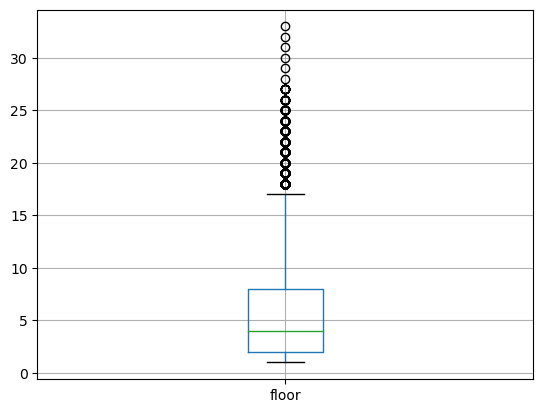

In [45]:
data.boxplot(column=['floor'])
data['floor'].describe()

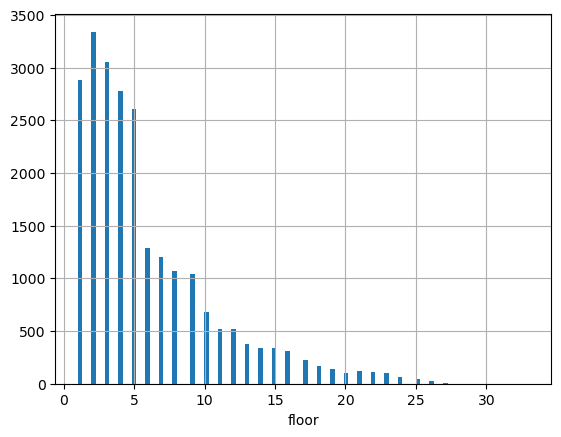

In [46]:
data['floor'].hist(bins=100).set_xlabel('floor');

The histogram tends to the Poisson distribution, but a large tail to the larger side. The ads on average contain ads for apartments on the 6th floor, with the median value belonging to the 4th floor. The minimum floor in the ads is 1, the maximum is 33, this data is logical.

Let's explore the `floor_type` column with information about the apartment floor types. Let's look at the ratio of groups using the method value_counts() and draw a pie chart.

In [47]:
data['floor_type'].value_counts()/data['floor_type'].count()*100

other    73.608151
last     14.097536
first    12.294313
Name: floor_type, dtype: float64

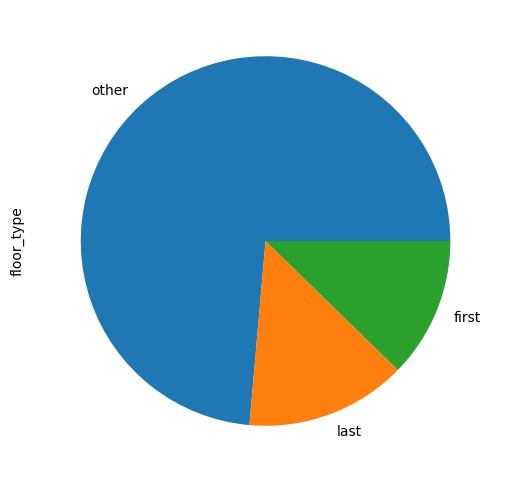

In [48]:
data['floor_type'].value_counts().plot(kind='pie', figsize=(6, 6));

The diagram clearly shows almost equal shares of the first and last floor apartment ad groups (12% and 14%) and a large group of other floors (74%). From the data, we conclude that there are the least number of listings for apartments for sale on the first floor.

Let's explore the `floors_total` column with information about the total number of floors in the house. Let's unload the data using the describe() method, build a boxplot and a histogram.

count    23458.000000
mean        10.673203
std          6.591979
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

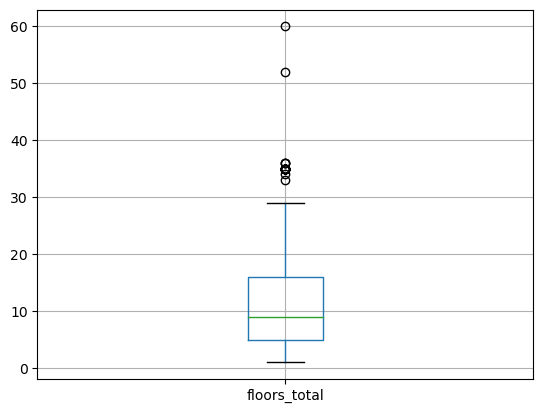

In [49]:
data.boxplot(column=['floors_total'])
data['floors_total'].describe()

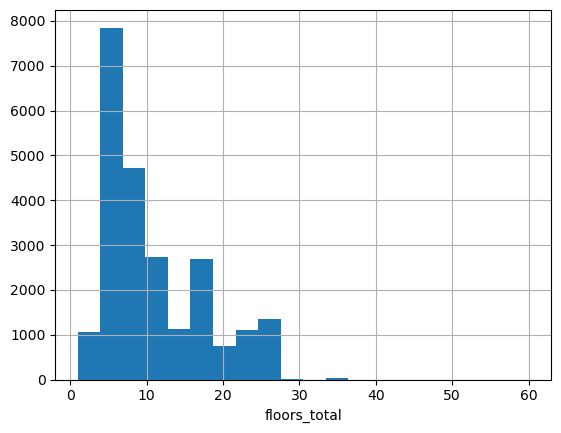

In [50]:
data['floors_total'].hist(bins=20).set_xlabel('floors_total');

Histogram of the normal distribution. The data suggests that on average the homes in the listings are 11 stories, but the median value indicates 9 stories. The minimum number of stories is 1 story, and the maximum is 60 stories.

Let's explore the column `city_centers_nearest_m` with information about the distance from the city center in meters. Let's unload the data using the describe() method, and build a boxplot and a histogram.

count    23458.000000
mean     10872.135775
std       9637.583532
min          0.000000
25%       2152.000000
50%      11246.000000
75%      15233.000000
max      65968.000000
Name: city_centers_nearest_m, dtype: float64

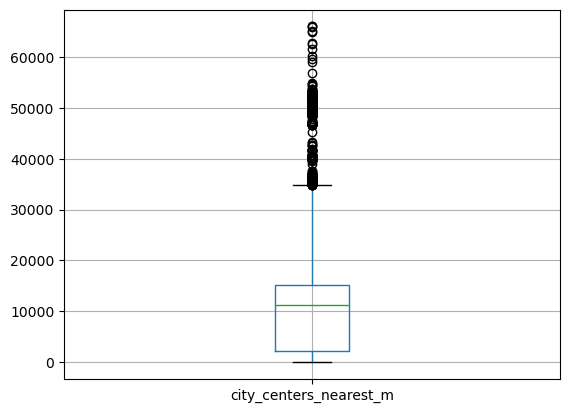

In [51]:
data.boxplot(column=['city_centers_nearest_m'])
data['city_centers_nearest_m'].describe()

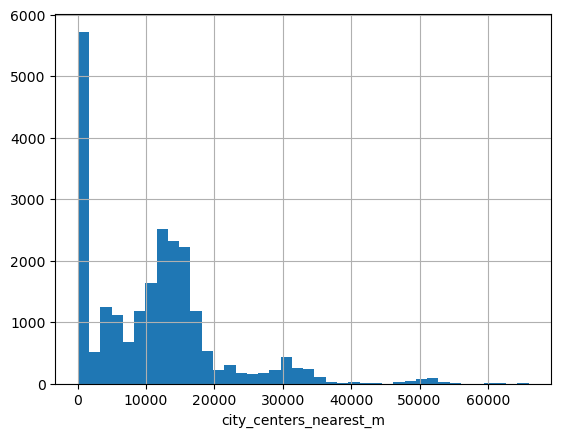

In [52]:
data['city_centers_nearest_m'].hist(bins=40).set_xlabel('city_centers_nearest_m');

From the data it follows that on average the apartments are located 10.9 km from the center, it almost coincides with the median value equal to 11.2 km. The furthest apartment from the center is 66 km, and the nearest is 0 (there are many zero values, but it should be noted that zero also denotes missing values, so it does not necessarily mean that the apartment is located in the immediate center of the city)

Let's explore the `airports_nearest_m` column with information about the distance from the city center in meters. Let's unload the data using the describe() method, build a boxplot and a histogram

count    23458.000000
mean     22016.910350
std      16458.682669
min          0.000000
25%      10140.500000
50%      21807.000000
75%      34279.000000
max      84869.000000
Name: airports_nearest_m, dtype: float64

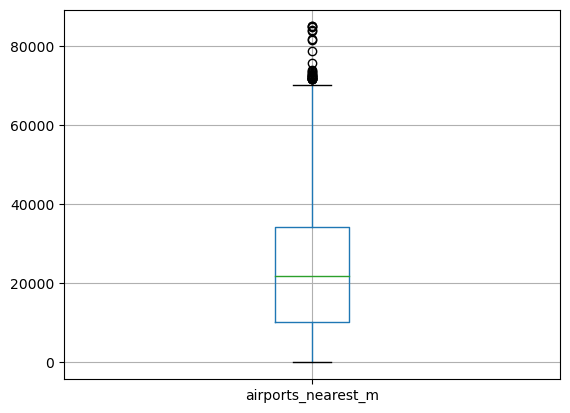

In [53]:
data.boxplot(column=['airports_nearest_m'])
data['airports_nearest_m'].describe()

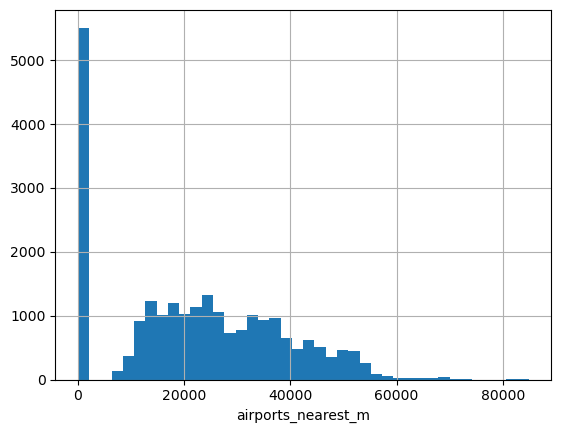

In [54]:
data['airports_nearest_m'].hist(bins=40).set_xlabel('airports_nearest_m');

From the data we can conclude that, on average, apartments are located 22 km from the airport, it almost coincides with the median value equal to 21.8 km. The furthest apartment from the airport is 85 km and the nearest is 0 (there are many zero values, but it should be noted that zero also denotes missing values, so it does not necessarily mean that the apartment is in close proximity to the airport)

Let's explore the column `parks_nearest_m` with information about the distance to the nearest park. Let's unload the data using the describe() method, build a boxplot and a histogram.

count    23458.000000
mean       166.667278
std        305.176817
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest_m, dtype: float64

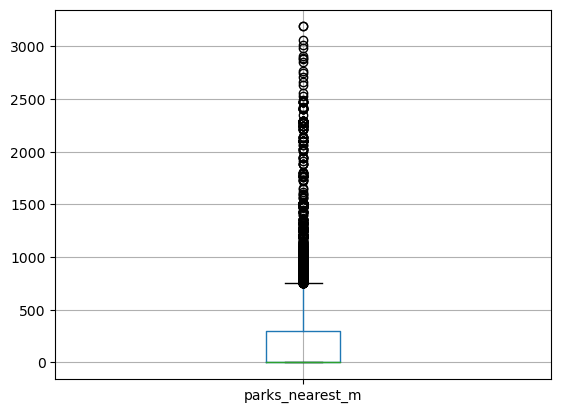

In [55]:
data.boxplot(column=['parks_nearest_m'])
data['parks_nearest_m'].describe()

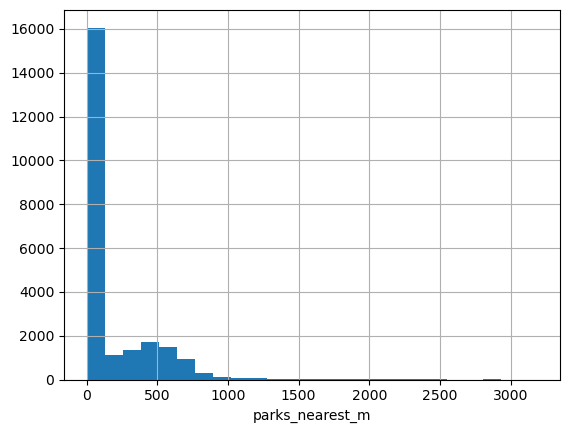

In [56]:
data['parks_nearest_m'].hist(bins=25).set_xlabel('parks_nearest_m');

From the data, we conclude that 50% of the ads with apartments are likely to be without a park nearby (missing values were indicated by zero). The apartments near which there are parks are 166 meters away on average, with a maximum park distance of 3.2 km.

Let's explore the `exposition_weekday` and `exposition_month` columns with information about the day and month the ad was published. Let's look at the ratio of groups using the method value_counts() and draw a pie chart for each column

Data by `exposition_weekday`:

In [57]:
data['exposition_weekday'].value_counts()/data['exposition_weekday'].count()*100

Thursday     18.130275
Tuesday      17.648563
Friday       16.915338
Wednesday    16.761872
Monday       15.231478
Saturday      8.159263
Sunday        7.153210
Name: exposition_weekday, dtype: float64

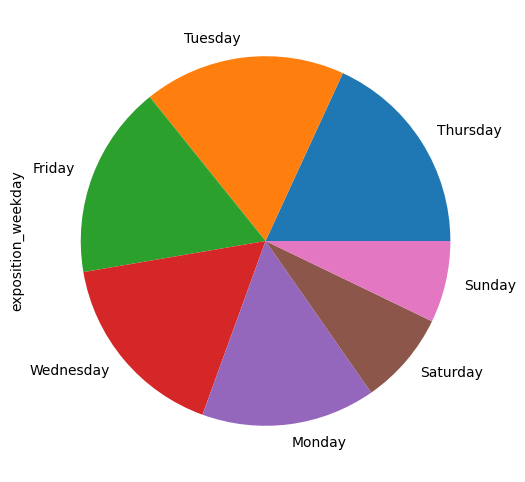

In [58]:
data['exposition_weekday'].value_counts().plot(kind='pie',figsize=(6, 6));

From the data on the days of the week, we can conclude that the number of postings on Thursday, Tuesday, Friday and Wednesday is about the same (shares by days 18.1%, 17.6%, 16.9% and 16.8%, respectively), with a slightly lower number of postings on Monday (15%.2%) and significantly lower on weekends (8% on Saturday and 7% on Sunday). The data look logical, since on weekends people prefer to rest and not do business

Data by `exposition_month`:

In [59]:
data['exposition_month'].value_counts()/data['exposition_month'].count()*100

February     11.156109
March        10.942962
November     10.017904
April        10.017904
October       8.892489
September     8.359621
June          7.426038
August        7.374883
July          7.157473
December      6.948589
January       6.338989
May           5.367039
Name: exposition_month, dtype: float64

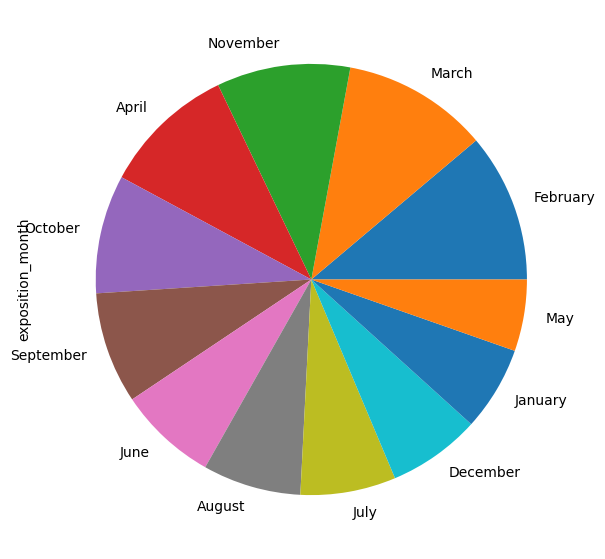

In [60]:
data['exposition_month'].value_counts().plot(kind='pie', figsize=(7, 7));

From the data, we can conclude that the number of ads that were published in February, March, April and November (11.2%, 10.9%, 10% and 10% respectively) is almost the same, while in September and October there is a slight decrease (8.3%, 8.9% respectively). The percentage of ads published in summer months is almost the same (7.4%, 7.1%, 7.4% respectively). The smallest number was in May (5.3%), also the lowest percentage was in December and January (6.9%, 6.3%). This may be due to the long vacations and holidays during these months, when people prefer not to do things and go on vacation.

Let's group the data to see on which day of the week and which month the smallest and largest number of ads were made:

In [61]:
data.groupby('exposition_month')['exposition_weekday'].value_counts().sort_values()

exposition_month  exposition_weekday
May               Sunday                 67
                  Saturday               73
August            Sunday                103
June              Sunday                117
January           Sunday                118
                                       ... 
April             Monday                448
February          Tuesday               453
March             Tuesday               486
November          Friday                517
February          Thursday              760
Name: exposition_weekday, Length: 84, dtype: int64

The data are logical: the smallest number of ads was on the weekend in May (67 on Sunday and 73 on Saturday), and the largest on Thursdays in February (760 ads). This confirms the conclusions drawn earlier.

**Conclusion:** we explored such parameters as total area, living area, kitchen area, object price, number of rooms, ceiling height, apartment floor, apartment floor type ("first", "last", "other"), total number of floors in the house, distance to the city center in meters, distance to the nearest airport, distance to the nearest park, day and month of the announcement. For each of these parameters we built bar charts and recorded observations, describing them under each bar chart. For example, we concluded that the smallest number of ads were published in May (5.3%), also the lowest number was in December and January (6.9%, 6.3%), it may be related to the long vacations and holidays in these months, when people prefer not to do anything and to go on vacation.

**II.** Let's study how fast the apartments were sold. To do this, let's build a histogram for the `days_exposition` column, and calculate the average and median using the describe() method:

In [62]:
data['days_exposition'].describe()

count    20309.000000
mean       180.872470
std        219.804252
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

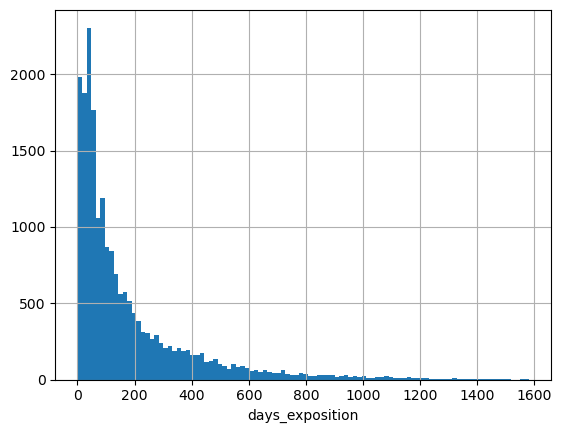

In [63]:
data['days_exposition'].hist(bins=100).set_xlabel('days_exposition');

**Conclusion:** on average it takes about 169 days to sell an apartment, but the median value indicates 95 days, which is almost half the average. Judging by the graph, this could have been due to asymmetry to the higher side and affected the average. It is more correct to use the median value, so it usually takes 95 days to sell an apartment. The fastest apartment sale occurred in 1 day, and the longest sale lasted 1,580 days (about 4 years). On average, fast sales can be considered up to 45 days, and long sales longer than 199 days (based on first and third apartment data)

**III.** Let's explore the dependence of the price of the total area, living space, kitchen area, number of rooms, the type of floor on which the apartment is located, the date of the ad (day of week, month, year)

Let's build a correlation matrix to trace the dependence of price on each factor, replacing the categorical values in the date and floor type columns with numerical values before doing so:

In [64]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year
data['floor_type'] = data['floor_type'].str.replace('first', '0')
data['floor_type'] = data['floor_type'].str.replace('other', '1')
data['floor_type'] = data['floor_type'].str.replace('last', '2')
data['floor_type'] = data['floor_type'].astype('int')
factors = data[['last_price_rub', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2','rooms',\
               'floor_type','exposition_weekday', 'exposition_month','exposition_year']]
factors.corr()

,last_price_rub,total_area_m2,living_area_m2,kitchen_area_m2,rooms,floor_type,exposition_weekday,exposition_month,exposition_year
last_price_rub,1.000000,0.655327,0.588088,0.513218,0.362294,0.057832,0.001829,0.002416,-0.041707
total_area_m2,0.655327,1.000000,0.953299,0.666324,0.760729,0.062031,-0.005298,0.003501,-0.077612
living_area_m2,0.588088,0.953299,1.000000,0.509461,0.828055,0.057508,-0.005411,-0.000455,-0.071709
kitchen_area_m2,0.513218,0.666324,0.509461,1.000000,0.328596,0.050821,-0.005403,0.003700,-0.058424
rooms,0.362294,0.760729,0.828055,0.328596,1.000000,0.024780,-0.005580,-0.004027,-0.055109
floor_type,0.057832,0.062031,0.057508,0.050821,0.024780,1.000000,0.006507,0.007886,0.004550
exposition_weekday,0.001829,-0.005298,-0.005411,-0.005403,-0.005580,0.006507,1.000000,0.012741,-0.003446
exposition_month,0.002416,0.003501,-0.000455,0.003700,-0.004027,0.007886,0.012741,1.000000,-0.269578
exposition_year,-0.041707,-0.077612,-0.071709,-0.058424,-0.055109,0.004550,-0.003446,-0.269578,1.000000


From the data in the table we can conclude that floor type, day of the week, month and year correlate very weakly with apartment prices (correlation 0.057, 0.001, 0.002, -0.04). The number of rooms in the apartment is weakly correlated with the apartment price (correlation 0.36). Kitchen area, living area, and total area in the apartment have an average correlation to apartment price (0.51, 0.58, and 0.65). Accordingly, the most influential factor on the apartment price is the total apartment area.

The correlation of year to price has a negative value, indicating their inverse dependence, and the fall in prices each year, let's check how the average price changed from year to year: 

In [65]:
data.groupby('exposition_year')['last_price_rub_mln'].agg(['count', 'mean', 'median'])

,count,mean,median
exposition_year,,,
2014,136,12.121037,7.8685
2015,1169,8.477812,5.3000
2016,2748,6.820839,4.5150
2017,8111,6.545553,4.5000
2018,8439,5.944984,4.5750
2019,2855,6.778825,5.0500


Apartment prices did fall from 2014 to 2017, but from 2018 to 2019 they began to rise. This explains the negative correlation tending toward zero.

Since the price is most influenced by the total area of the apartment, let's look at them in more detail, first dividing the apartment prices into groups (E - very low price, D - low price, C - average price, B - high price, A - very high price) and displaying the number of ads, the average apartment area and median area within the price categories:

In [66]:
def price_category(row):
    try:
        if 0 <= row <= 2000000:
            return 'E very low price'
        elif 2000001 <= row <= 3500000:
            return 'D low price'
        elif 3500001 <= row <= 6000000:
            return 'C average price'
        elif 6000001 <= row <= 12000000:
            return 'B high price'
        elif row >= 12000001:
            return 'A very high price'
    except:
        return 'no'
data['last_price_rub_category'] = data['last_price_rub'].apply(price_category)

In [67]:
price_area_stat = data.pivot_table(index='last_price_rub_category', values='total_area_m2')
data.groupby('last_price_rub_category')['total_area_m2'].agg(['count', 'mean', 'median'])

,count,mean,median
last_price_rub_category,,,
A very high price,1896,136.188914,118.0
B high price,5338,74.155247,71.9
C average price,9820,50.614478,48.0
D low price,4970,40.468231,37.0
E very low price,1434,41.858068,41.0


From the table we can conclude that with the increase of the area of the apartment, the price really rises, but it is worth noting that in the categories up to 6 million rubles the average area of the apartment is practically the same.

Let's build a scatter matrix for the most price-related factors (total area, living area, kitchen area)

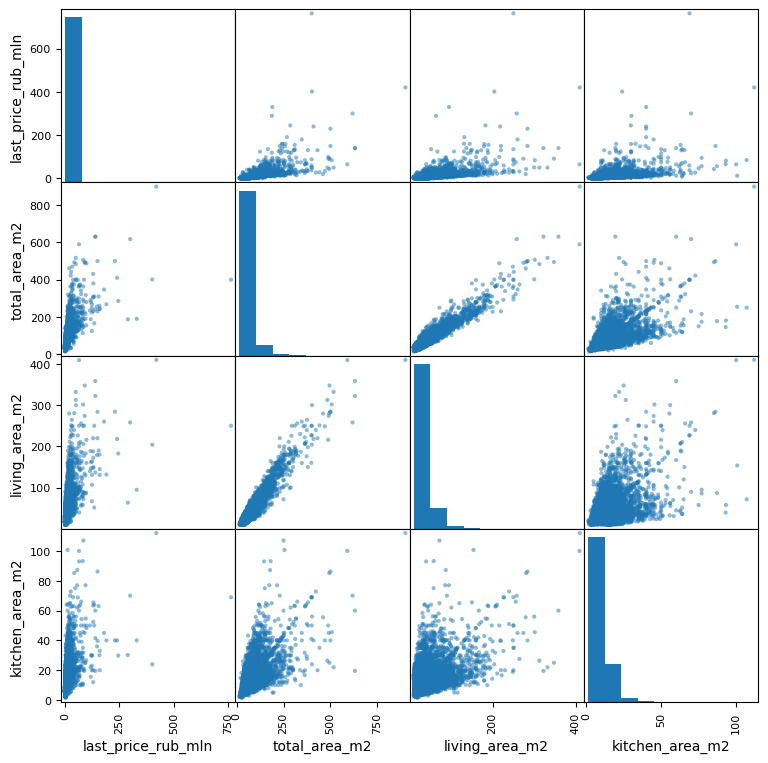

In [68]:
good_factors = data[['last_price_rub_mln', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2']]
pd.plotting.scatter_matrix(good_factors, figsize=(9, 9));

The graphs clearly show the conclusions drawn earlier, and it is also worth noting the graph of the correlation between the total area of the apartment and the living space. Their correlation is very high and tends to 1.

**Conclusion:** the most influential factor on the price of the apartment is the total area of the apartment. The most correlated factors are the total apartment area and living area (correlation 0.95), and the number of rooms and living area (correlation 0.83).

**IV.** Let's calculate the average price per square meter in the 10 localities with the largest number of ads.

In [69]:
top_ten_locality = data.pivot_table(index='locality_name', values='price_one_m2', aggfunc=['count', 'median', 'mean','min','max'])
top_ten_locality.columns = ('count','median','mean','min','max')
top_ten_locality.sort_values('count', ascending=False).head(10)

,count,median,mean,min,max
locality_name,,,,,
Санкт-Петербург,15535,104687.500,114730.227967,15861.57,1907500.00
Мурино,581,86119.400,85895.653305,50000.00,130000.00
Кудрово,469,95588.240,95260.658507,54160.35,160401.00
Шушары,437,76829.270,78563.355606,47700.42,147826.09
Всеволожск,398,65789.470,68654.473970,31400.00,640422.35
Пушкин,366,100000.000,103210.993169,59836.07,256521.74
Колпино,336,74729.185,75526.880506,50819.67,125000.00
Парголово,326,91780.225,90193.677883,39205.96,138522.43
Гатчина,306,67860.570,68935.194575,10507.25,146315.79


**Conclusion:** we reviewed the 10 most common localities in the listings. On average the most expensive square meter in the apartments of St. Petersburg (114.7 thousand rubles), while the median value is lower because of the very expensive apartments overestimate the average. It is more correct to be guided by the median, which is equal to 104 thousand rubles and is close to the cost of one square meter in the town of Pushkin (100 thousand rubles). The cheapest square meter on average in ads for apartments for sale in the city of Vyborg. The maximum price per square meter is 1.9 million rubles in ads for apartments for sale in St. Petersburg. The minimum price per square meter is 10 thousand rubles in an ad for an apartment in Gatchina.
It should also be noted that the largest number of ads for the sale of apartments in St.Petersburg, and the smallest in Vyborg.

**V.** Let's calculate the average price for each kilometer for apartments in St. Petersburg and describe how the cost of the objects depends on the distance to the city center

In [70]:
data['one_km_price'] = data['last_price_rub_mln'] / data['city_centers_nearest_km']
spb_data = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km!=0')
spb_data
print('Average price per kilometer:', spb_data['one_km_price'].median())

Average price per kilometer: 0.446875


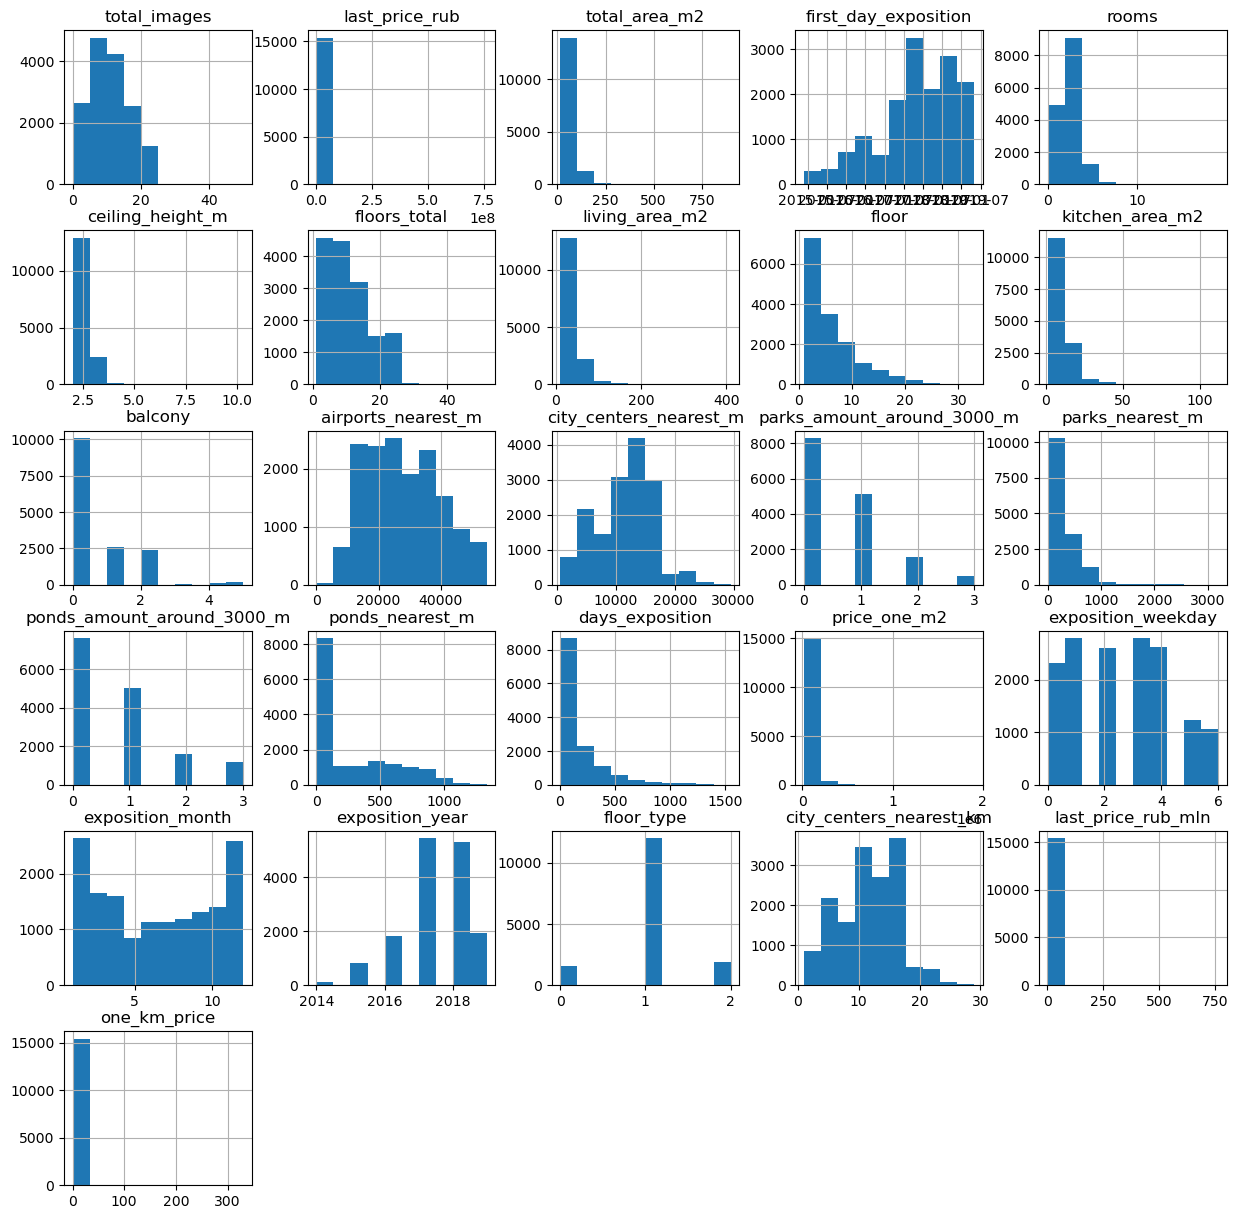

In [71]:
spb_data.hist(figsize=(15,15));

We found out that the average price per kilometer is 446 thousand rubles. Previously, we have grouped apartment prices by category. Let's look at the average, maximum and minimum value within each group, as well as the number of listings in St. Petersburg by these groups:

In [72]:
spb_km_price = spb_data.pivot_table(index='last_price_rub_category', \
                                    values='one_km_price', \
                                    aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
last_price_rub_category,,,,,
A very high price,1791,3.158333,6.438779,0.531481,330.000000
B high price,4798,0.768077,1.284270,0.225000,12.000000
C average price,7238,0.349167,0.424045,0.130929,5.980000
D low price,1612,0.225000,0.249749,0.083333,3.500000
E very low price,11,0.108626,0.130931,0.094670,0.316667


**Conclusion:** along with the average price per 1 km increases the price of the apartment. The highest average price per 1km belongs to Class A listings (over 12 million rubles per apartment), and then the prices per 1km decrease with housing prices. It is worth mentioning that in St. Petersburg there are practically no very low-priced offers (category E, prices up to 2 mln. rub.), there are only 11 such offers.

Now let's see the remoteness from the center in kilometers for these price groups:

In [73]:
spb_km_price = spb_data.pivot_table(index='last_price_rub_category', values='city_centers_nearest_km', aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
last_price_rub_category,,,,,
A very high price,1791,6.0,7.177554,1.0,27.0
B high price,4798,11.0,10.146311,1.0,28.0
C average price,7238,13.0,13.097955,1.0,29.0
D low price,1612,14.0,14.178040,1.0,29.0
E very low price,11,15.0,14.000000,6.0,18.0


In [74]:
spb_km_price = spb_data.pivot_table(index='city_centers_nearest_km', values='last_price_rub_mln', aggfunc=['count', 'median', 'mean','min','max'])
spb_km_price.columns = ('count','median','mean','min','max')
spb_km_price

,count,median,mean,min,max
city_centers_nearest_km,,,,,
1.0,190,11.490000,21.397318,3.500000,330.000000
2.0,308,10.000000,17.818114,2.100000,401.300000
3.0,346,8.409000,11.144981,2.385000,88.000000
4.0,679,9.200000,13.323249,2.176000,763.000000
5.0,898,9.483000,14.476980,2.740000,300.000000
6.0,614,8.895000,15.181845,1.900000,245.000000
7.0,413,7.800000,14.539145,2.250000,135.000000
8.0,588,7.375000,9.878694,2.190000,420.000000
9.0,586,5.350500,6.977712,2.346000,39.900000


The table shows that the farther away an apartment is from the center, the lower its price is, the apartments at an average distance of 6 km from the center have the highest prices, and the lowest prices for apartments at 15 km from the center. It is also worth noting that after 8 km the price drops dramatically. Let's look at the correlation:

In [75]:
price_distance = spb_data[['last_price_rub', 'city_centers_nearest_km']]
price_distance.corr()

,last_price_rub,city_centers_nearest_km
last_price_rub,1.000000,-0.254878
city_centers_nearest_km,-0.254878,1.000000


The values of the apartment price and the distance from the center have a correlation (-0.25), which means that the correlation is weak and inverse (with the increase in the distance from the center - the price decreases).

**Conclusion:** within the city of Saint-Petersburg the farther the apartment is from the center, the lower the price is, the apartments at an average distance of 6km from the center have the highest prices, and the lowest prices are for the apartments at 15km from the center. After 8 km the price drops sharply, we also found out that the indicators of the apartment price and the distance to the center have a correlation (-0.25), which means that the correlation is weak and inverse (the price drops as the distance to the center increases).

## 4. General conclusion

1. we explored such parameters as total area, living area, kitchen area, object price, number of rooms, ceiling height, apartment floor, apartment floor type ("first", "last", "other"), total number of floors in the building, distance to the city center in meters, distance to the nearest airport, distance to the nearest park, day and month of the announcement. For each of these parameters we built bar charts and recorded observations, describing them under each bar chart, for example the conclusion that the smallest number of ads published in May (5.3%), also a low proportion of ads published in December and January (6.9%, 6.3%), it may be connected to long vacations and holidays in these months, when people prefer not to do things, and go on vacation.
2. we explored how quickly apartments were sold and found that on average it takes 95 days to sell an apartment. The fastest apartment sale took 1 day, and the longest sale lasted 1,580 days (about 4 years). On average, fast sales can be considered up to 45 days, and long sales over 199 days.
3. We explored the factors that most affect the total (total) value of the property and found that the most influential factor on the price of the apartment is the total area of the apartment.
4. we have calculated the average price per square meter in 10 cities with the largest number of ads and found that on average the most expensive square meter in St. Petersburg apartments (104 thousand rubles), and the cheapest in Vyborg. The maximum price per square meter is 1.9 million rubles in an ad for an apartment in St. Petersburg. The minimum price per sq.m. is 10,000 rubles in a listing for an apartment in Gatchina. The largest number of apartments for sale in St. Petersburg, the smallest in Vyborg.
5. we have calculated an average price for each kilometer, allocating apartments only in Saint-Petersburg, and found out that the further away the apartment is, the lower the price is, the apartments at 6 km distance from the center have the highest prices, and the lowest prices for apartments at 15 km from the center. After 8 km the price drops dramatically. We also found out that the indicators of the apartment price and the distance to the center have a correlation (-0.25), which means that the correlation is weak and inverse (with the increase in the distance to the center - the price decreases).

It follows from this that different parameters of the apartments can be interconnected with each other (e.g. living area and total area of the apartment) and can be independent of each other (day of advertisement publication and price of apartment), for this purpose we use correlation analysis, graphs and joining of different factors into groups. 